# IMPORT DEPENDENCIES

In [1]:
import numpy
import pandas
import keras
import tensorflow
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

# LOAD DATASET 

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## DECODING NEWSWIRES BACK TO TEXT

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[0]

3

## PREPROCESSING DATA

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# MODEL BUILDING

In [12]:
from keras import models

In [13]:
from keras import layers

In [15]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### COMPILING MODEL

In [16]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

### VALIDATING 

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## TRAINING MODEL

In [18]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 57ms/step - loss: 2.7292 - accuracy: 0.5011 - val_loss: 1.8085 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.4468 - accuracy: 0.7144 - val_loss: 1.3215 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.0658 - accuracy: 0.7765 - val_loss: 1.1386 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8428 - accuracy: 0.8213 - val_loss: 1.0509 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6727 - accuracy: 0.8574 - val_loss: 1.0191 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5466 - accuracy: 0.8852 - val_loss: 0.9393 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4434 - accuracy: 0.9073 - val_loss: 0.9007 - val_accuracy: 0.8120
Epoch 8/20
16

## PLOTTING THE LOSS VS EPOCHS

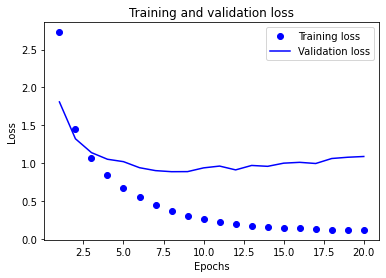

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## PLOTTING ACCURACY VS EPOCHS

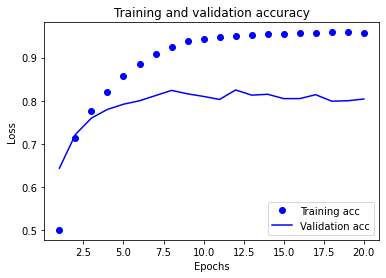

In [22]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### NOTE:- CLEARLY FROM ABOVE GRAPH, IT IS CLEAR THAT THERE IS OVERFITTING FROM 9 EPOCHS. SO, LET TRAIN OUR MODEL FROM SCRACH UPTO 9 EPOCHS AND THEN EVALUATE ON TEST SET.

# RETRAINING MODEL FROM SCRACH

In [23]:
# MODEL BUILDING

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# COMPLILING MODEL

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#TRAINING MODEL

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))

# FINAL RESULT OF MODEL

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 43ms/step - loss: 2.6748 - accuracy: 0.4792 - val_loss: 1.7639 - val_accuracy: 0.6170
Epoch 2/9
16/16 [==============================] - 1s 35ms/step - loss: 1.4465 - accuracy: 0.7042 - val_loss: 1.3179 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 1s 34ms/step - loss: 1.0668 - accuracy: 0.7800 - val_loss: 1.1675 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 33ms/step - loss: 0.8469 - accuracy: 0.8241 - val_loss: 1.0523 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 1s 31ms/step - loss: 0.6789 - accuracy: 0.8558 - val_loss: 0.9846 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 31ms/step - loss: 0.5496 - accuracy: 0.8860 - val_loss: 0.9449 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 33ms/step - loss: 0.4395 - accuracy: 0.9082 - val_loss: 0.9316 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [24]:
results

[0.9825112223625183, 0.7849510312080383]

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1731967943009795

# PREDICTIONS ON NEW BRAND DATA

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

1.0000001

In [29]:
np.argmax(predictions[0])

3

# GREAT JOB!